## Visualizing data from the MRR-2

This notebooks shows how to visualize data from the MRR-2 at ATMOS. 

The first cell here loads the necessary libraries:
    * Py-ART
    * xarray
    * sage_data_client
    * matplotlib
    * numpy

In [56]:
import matplotlib.pyplot as plt
import numpy as np
import pyart
import sage_data_client
import xarray as xr
import pandas as pd
import requests
import tempfile
import getpass
import os
import glob
import subprocess
%matplotlib inline

Query the available data from the SAGE data client in the last 2 hours. Set the start keyword to the last $x$ hours of data that you need. For example, if we you want the last 12 hours of data, use *start='-12h'*.

In [95]:
df = sage_data_client.query(
            start="-72h",
            filter={"vsn": "W057", "name": "upload", "task": "mrr2-process",
                    }).set_index("timestamp")

Let's see what files are available.

In [96]:
df

,name,value,meta.filename,meta.host,meta.node,meta.plugin,meta.task,meta.vsn,meta.zone,meta.job
timestamp,,,,,,,,,,
2023-08-18 23:03:07.781613169+00:00,upload,https://storage.sagecontinuum.org/api/v1/data/...,mrr2atmos.20230818.210000.nc,0000e45f013fa9d1.ws-rpi,000048b02d3ae336,registry.sagecontinuum.org/rjackson/mrr2-proce...,mrr2-process,W057,shield,NaN
2023-08-19 04:02:44.058435777+00:00,upload,https://storage.sagecontinuum.org/api/v1/data/...,mrr2atmos.20230819.030000.nc,0000e45f013fa9d1.ws-rpi,000048b02d3ae336,registry.sagecontinuum.org/rjackson/mrr2-proce...,mrr2-process,W057,shield,NaN
2023-08-19 05:03:00.661004130+00:00,upload,https://storage.sagecontinuum.org/api/v1/data/...,mrr2atmos.20230819.040000.nc,0000e45f013fa9d1.ws-rpi,000048b02d3ae336,registry.sagecontinuum.org/rjackson/mrr2-proce...,mrr2-process,W057,shield,NaN
2023-08-19 06:03:02.460553631+00:00,upload,https://storage.sagecontinuum.org/api/v1/data/...,mrr2atmos.20230819.050000.nc,0000e45f013fa9d1.ws-rpi,000048b02d3ae336,registry.sagecontinuum.org/rjackson/mrr2-proce...,mrr2-process,W057,shield,NaN
2023-08-19 08:03:11.321756247+00:00,upload,https://storage.sagecontinuum.org/api/v1/data/...,mrr2atmos.20230819.060000.nc,0000e45f013fa9d1.ws-rpi,000048b02d3ae336,registry.sagecontinuum.org/rjackson/mrr2-proce...,mrr2-process,W057,shield,NaN
2023-08-19 09:03:05.041698719+00:00,upload,https://storage.sagecontinuum.org/api/v1/data/...,mrr2atmos.20230819.080000.nc,0000e45f013fa9d1.ws-rpi,000048b02d3ae336,registry.sagecontinuum.org/rjackson/mrr2-proce...,mrr2-process,W057,shield,NaN
2023-08-19 10:02:53.843738302+00:00,upload,https://storage.sagecontinuum.org/api/v1/data/...,mrr2atmos.20230819.090000.nc,0000e45f013fa9d1.ws-rpi,000048b02d3ae336,registry.sagecontinuum.org/rjackson/mrr2-proce...,mrr2-process,W057,shield,NaN
2023-08-19 11:02:52.787172791+00:00,upload,https://storage.sagecontinuum.org/api/v1/data/...,mrr2atmos.20230819.100000.nc,0000e45f013fa9d1.ws-rpi,000048b02d3ae336,registry.sagecontinuum.org/rjackson/mrr2-proce...,mrr2-process,W057,shield,NaN
2023-08-19 13:03:01.124637412+00:00,upload,https://storage.sagecontinuum.org/api/v1/data/...,mrr2atmos.20230819.110000.nc,0000e45f013fa9d1.ws-rpi,000048b02d3ae336,registry.sagecontinuum.org/rjackson/mrr2-proce...,mrr2-process,W057,shield,NaN


The below code will grab the list of files. Some time periods are duplicated from testing the plugin, so we remove the duplicates here.

In [97]:
file_list = list(df.value.values)

cur_time = ""
for f in file_list:
    time_stamp = f[-18:]
    if cur_time == time_stamp:
        file_list.remove(f)
    else:
        cur_time = time_stamp

In [98]:
file_list

['https://storage.sagecontinuum.org/api/v1/data/sage/sage-mrr2-process-2023.7.13.3/000048b02d3ae336/1692399787781613169-mrr2atmos.20230818.210000.nc',
 'https://storage.sagecontinuum.org/api/v1/data/sage/sage-mrr2-process-2023.7.13.3/000048b02d3ae336/1692417764058435777-mrr2atmos.20230819.030000.nc',
 'https://storage.sagecontinuum.org/api/v1/data/sage/sage-mrr2-process-2023.7.13.3/000048b02d3ae336/1692421380661004130-mrr2atmos.20230819.040000.nc',
 'https://storage.sagecontinuum.org/api/v1/data/sage/sage-mrr2-process-2023.7.13.3/000048b02d3ae336/1692424982460553631-mrr2atmos.20230819.050000.nc',
 'https://storage.sagecontinuum.org/api/v1/data/sage/sage-mrr2-process-2023.7.13.3/000048b02d3ae336/1692432191321756247-mrr2atmos.20230819.060000.nc',
 'https://storage.sagecontinuum.org/api/v1/data/sage/sage-mrr2-process-2023.7.13.3/000048b02d3ae336/1692435785041698719-mrr2atmos.20230819.080000.nc',
 'https://storage.sagecontinuum.org/api/v1/data/sage/sage-mrr2-process-2023.7.13.3/000048b02d3

This code will download the MRR data from Beehive and then concatenate the results
into a single xarray dataset.

In [87]:
if not os.path.exists('mrr2_data_raw'):
    os.mkdir('mrr2_data_raw')
    
def readtofile(uurl, ff):
    r = requests.get(uurl)
    if r.status_code == 200:
        print('Downloading %s' % uurl.split("-")[-1])
        with open(ff, 'wb') as out:
            for bits in r.iter_content():
                out.write(bits)
    
    return True
temp_file_list = []
for f in file_list:
    name = f.split("-")[-1]
    print(name)
    if '.raw' in name:
        continue
    out_name = 'mrr2_data/%s' % name
    if not os.path.exists(out_name):
        readtofile(f, out_name)
    if not out_name in temp_file_list:
        temp_file_list.append(out_name)

mrr2atmos.20230817.130000.nc
mrr2atmos.20230817.140000.nc
mrr2atmos.20230817.150000.nc
mrr2atmos.20230817.160000.nc
mrr2atmos.20230817.170000.nc
mrr2atmos.20230817.180000.nc
mrr2atmos.20230817.190000.nc
mrr2atmos.20230817.210000.nc
mrr2atmos.20230818.010000.nc
mrr2atmos.20230818.020000.nc
mrr2atmos.20230818.040000.nc
mrr2atmos.20230818.080000.nc
mrr2atmos.20230818.100000.nc
mrr2atmos.20230818.110000.nc
mrr2atmos.20230818.120000.nc


Let's view a downloaded file!

In [89]:
ds_list = []
for file in sorted(glob.glob('mrr2_data/mrr2atmos.20230818*.nc')):
    d = xr.open_dataset(file)
    print((str(d.time_utc[0].dt.strftime('%Y-%m-%dT%H:00:00').values)))
    d_range = pd.date_range(str(d.time_utc[0].dt.strftime('%Y-%m-%dT%H:00:00').values),
                            freq='60s', periods=60)
    d = d.reindex(time_utc=d_range, method='nearest', tolerance=np.timedelta64(1, 'm') / np.timedelta64(1, 'ns'))
    d = d.drop_dims('time')
    ds_list.append(d)

ds = xr.concat(ds_list, dim='time_utc', coords='minimal').sortby('time_utc')

IndexError: index 0 is out of bounds for axis 0 with size 0

Let's preview the xarray dataset's contents! Example variables that are recorded by the MRR-2 are:

    * Ze, which is the equivalent reflectivity. This shows the intensity of precipitation.
    * W, the Doppler velocity. This shows how quickly the detected objects are falling toward the MRR-PRO.
    * SNR, signal to noise ratio. Ratios < 1 show where the MRR-PRO signal is weak and likely noise.
    * N(D), the retrieved rain droplet size distribution.
    

In [65]:
glob.glob('mrr2_data/mrr2atmos.20230817*.nc')

['mrr2_data/mrr2atmos.20230817.150000.nc',
 'mrr2_data/mrr2atmos.20230817.190000.nc',
 'mrr2_data/mrr2atmos.20230817.170000.nc',
 'mrr2_data/mrr2atmos.20230817.130000.nc',
 'mrr2_data/mrr2atmos.20230817.140000.nc',
 'mrr2_data/mrr2atmos.20230817.180000.nc',
 'mrr2_data/mrr2atmos.20230817.160000.nc',
 'mrr2_data/mrr2atmos.20230817.120000.nc']

Let's look at Ze, the equivalent reflectivity.

The above plot shows some precipitation occurring around 20Z, so let's zoom into that!

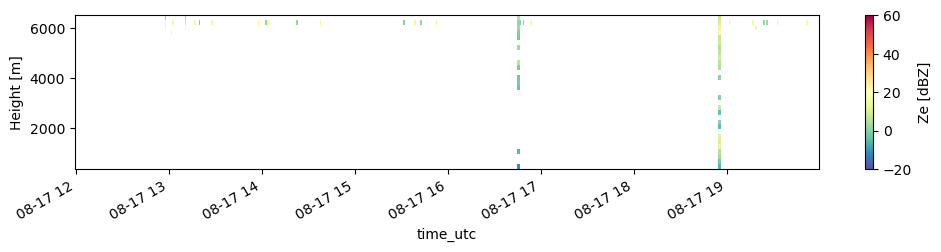

In [66]:
plt.figure(figsize=(12, 2))
ds.Ze.T.plot(cmap='Spectral_r', vmin=-20, vmax=60)
plt.savefig('mrr2_Ze_0702.png', bbox_inches='tight')

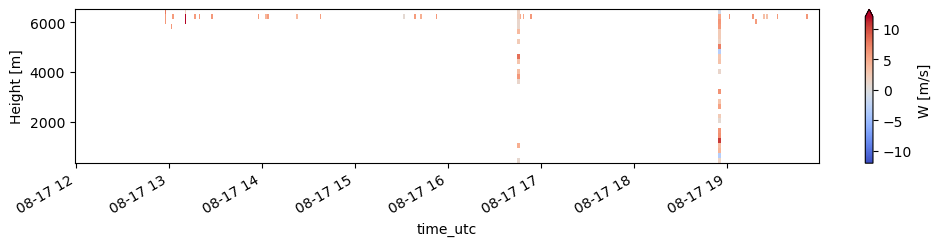

In [67]:
plt.figure(figsize=(12, 2))
ds.W.T.plot(cmap='coolwarm', vmin=-12, vmax=12)
plt.savefig('mrr2_W_0702.png', bbox_inches='tight')